In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('corona.csv')

C:\Users\anush\AppData\Local\Temp\ipykernel_30036\3501729670.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('corona.csv')


In [70]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


## Formatting data to have Convert string (object) values to boolean values or Null Values

In [72]:
df['Cough_symptoms'].unique()
df['Cough_symptoms'] = df['Cough_symptoms'].replace({'TRUE':True,'FALSE':False,'None':np.nan})
df['Cough_symptoms'].isnull().sum()

252

In [73]:
df['Fever'].unique()
df['Fever'] = df['Fever'].replace({'TRUE':True,'FALSE':False,'None':np.nan})

In [74]:
df['Sore_throat'].unique()
df['Sore_throat'] = df['Sore_throat'].replace({'TRUE':True,'FALSE':False,'None':np.nan})

In [75]:
df['Shortness_of_breath'].unique()
df['Shortness_of_breath'] = df['Shortness_of_breath'].replace({'TRUE':True,'FALSE':False,'None':np.nan})

In [76]:
df['Headache'].unique()
df['Headache'] = df['Headache'].replace({'TRUE':True,'FALSE':False,'None':np.nan})

In [77]:
df['Corona'].unique()
df['Corona'] = df['Corona'].replace({'negative':0,'positive':1,'other':np.nan})

In [78]:
df['Age_60_above'].unique()
df['Age_60_above'] = df['Age_60_above'].replace({'Yes':True,'No':False,'None':np.nan})

In [79]:
df['Sex'].unique()
df['Sex'] = df['Sex'].replace({'None':np.nan})

In [80]:
df['Known_contact'].unique()
df['Known_contact'] = df['Known_contact'].replace({'Other':np.nan})

## Data Cleaning

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Ind_ID               278848 non-null  int64  
 1   Test_date            278848 non-null  object 
 2   Cough_symptoms       278596 non-null  object 
 3   Fever                278596 non-null  object 
 4   Sore_throat          278847 non-null  object 
 5   Shortness_of_breath  278847 non-null  object 
 6   Headache             278847 non-null  object 
 7   Corona               274956 non-null  float64
 8   Age_60_above         151528 non-null  object 
 9   Sex                  259285 non-null  object 
 10  Known_contact        36107 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 23.4+ MB


In [82]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact          242741
dtype: int64

## We drop the Contact and Age columns because the number of missing values is more than 10% as well as the rows which have Null as the target variable

In [83]:
df = df.drop(['Known_contact','Age_60_above','Sex'],axis=1)

In [84]:
df.isnull().sum()

Ind_ID                    0
Test_date                 0
Cough_symptoms          252
Fever                   252
Sore_throat               1
Shortness_of_breath       1
Headache                  1
Corona                 3892
dtype: int64

In [85]:
df = df.drop(df[df['Cough_symptoms'].isnull()].index,axis=0)

In [86]:
df.isnull().sum()

Ind_ID                    0
Test_date                 0
Cough_symptoms            0
Fever                     2
Sore_throat               0
Shortness_of_breath       0
Headache                  0
Corona                 3892
dtype: int64

In [87]:
df = df.drop(df[df['Fever'].isnull()].index,axis=0)

In [88]:
df.isnull().sum()

Ind_ID                    0
Test_date                 0
Cough_symptoms            0
Fever                     0
Sore_throat               0
Shortness_of_breath       0
Headache                  0
Corona                 3892
dtype: int64

In [89]:
df = df.drop(df[df['Corona'].isnull()].index,axis=0)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Ind_ID               274702 non-null  int64  
 1   Test_date            274702 non-null  object 
 2   Cough_symptoms       274702 non-null  object 
 3   Fever                274702 non-null  object 
 4   Sore_throat          274702 non-null  object 
 5   Shortness_of_breath  274702 non-null  object 
 6   Headache             274702 non-null  object 
 7   Corona               274702 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 18.9+ MB


## Dropping ID and Test Date as irrelevant Data in terms of prediction via symptoms

In [91]:
df = df.drop('Ind_ID',axis=1)

In [92]:
df = df.drop('Test_date',axis=1)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cough_symptoms       274702 non-null  object 
 1   Fever                274702 non-null  object 
 2   Sore_throat          274702 non-null  object 
 3   Shortness_of_breath  274702 non-null  object 
 4   Headache             274702 non-null  object 
 5   Corona               274702 non-null  float64
dtypes: float64(1), object(5)
memory usage: 14.7+ MB


In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
le = LabelEncoder()
df['Cough_symptoms'] = le.fit_transform(df['Cough_symptoms'])
df['Fever'] = le.fit_transform(df['Fever'])
df['Sore_throat'] = le.fit_transform(df['Sore_throat'])
df['Shortness_of_breath'] = le.fit_transform(df['Shortness_of_breath'])
df['Headache'] = le.fit_transform(df['Headache'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cough_symptoms       274702 non-null  int32  
 1   Fever                274702 non-null  int32  
 2   Sore_throat          274702 non-null  int32  
 3   Shortness_of_breath  274702 non-null  int32  
 4   Headache             274702 non-null  int32  
 5   Corona               274702 non-null  float64
dtypes: float64(1), int32(5)
memory usage: 9.4 MB


In [97]:
X = df.drop('Corona',axis=1)
y = df['Corona']

In [98]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=0,test_size=0.2)

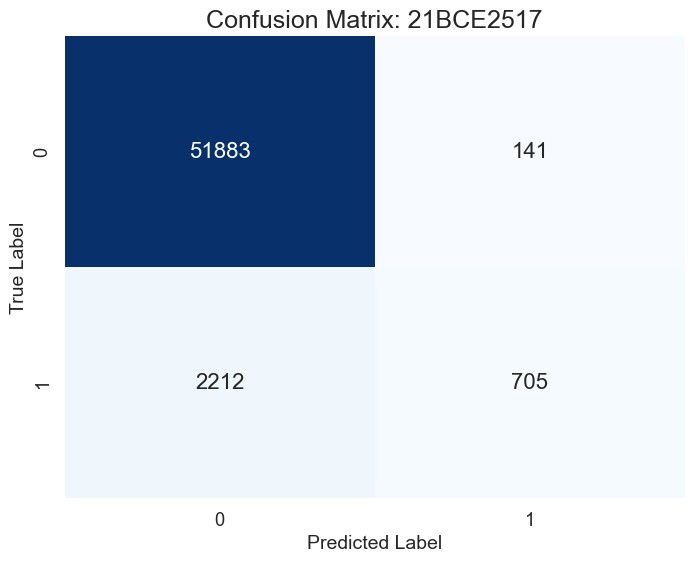

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model1 = SVC(kernel='linear',C=1)
model1.fit(xtrain,ytrain)
ypreds = model1.predict(xtest)
cm = confusion_matrix(ytest, ypreds)


plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix: 21BCE2517', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

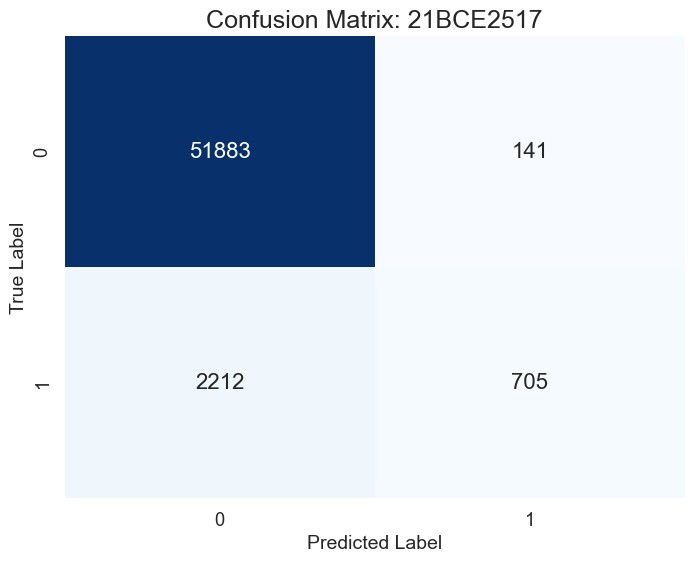

In [100]:
model1 = SVC(kernel='linear',C=0.5)
model1.fit(xtrain,ytrain)
ypreds = model1.predict(xtest)
cm = confusion_matrix(ytest, ypreds)


plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix: 21BCE2517', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

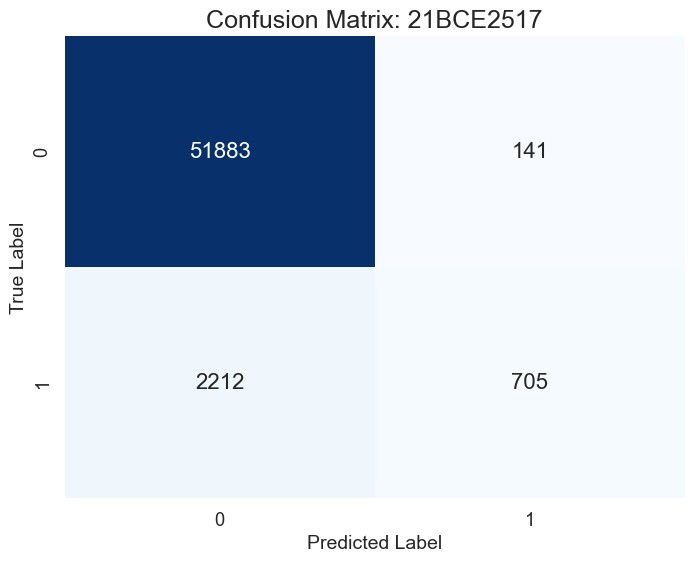

In [101]:
model1 = SVC(kernel='linear',C=0.1)
model1.fit(xtrain,ytrain)
ypreds = model1.predict(xtest)
cm = confusion_matrix(ytest, ypreds)


plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix: 21BCE2517', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

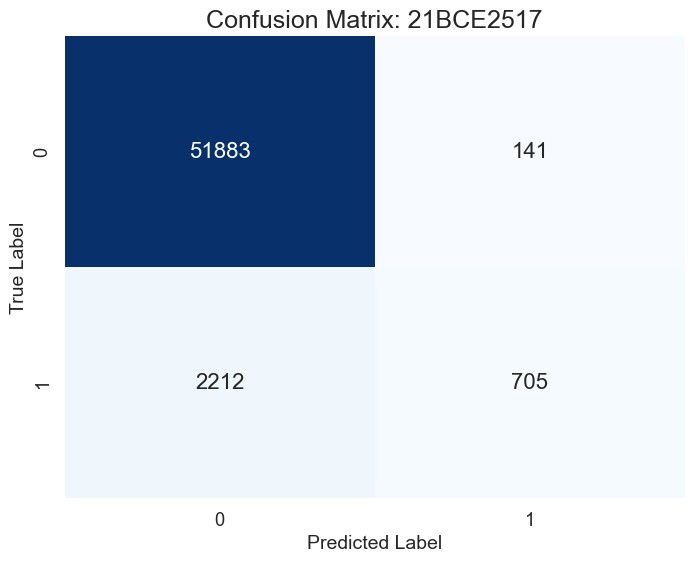

In [102]:
model1 = SVC(kernel='rbf',C=1)
model1.fit(xtrain,ytrain)
ypreds = model1.predict(xtest)
cm = confusion_matrix(ytest, ypreds)


plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix: 21BCE2517', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

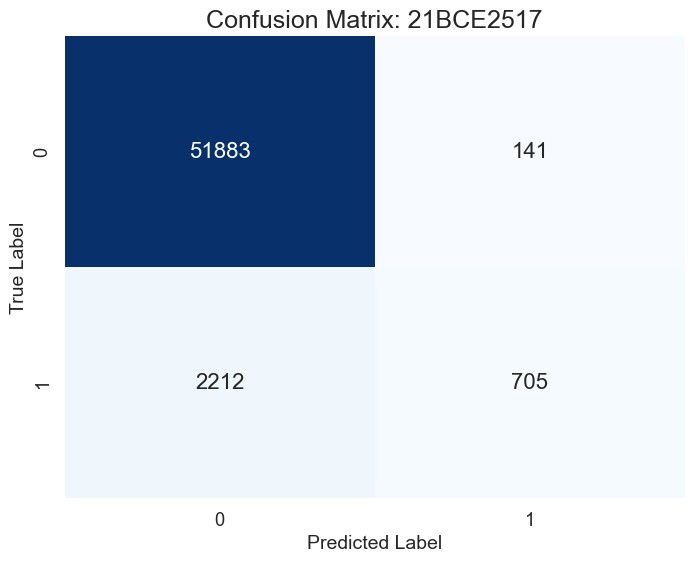

In [103]:
model1 = SVC(kernel='rbf',C=0.5)
model1.fit(xtrain,ytrain)
ypreds = model1.predict(xtest)
cm = confusion_matrix(ytest, ypreds)


plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix: 21BCE2517', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

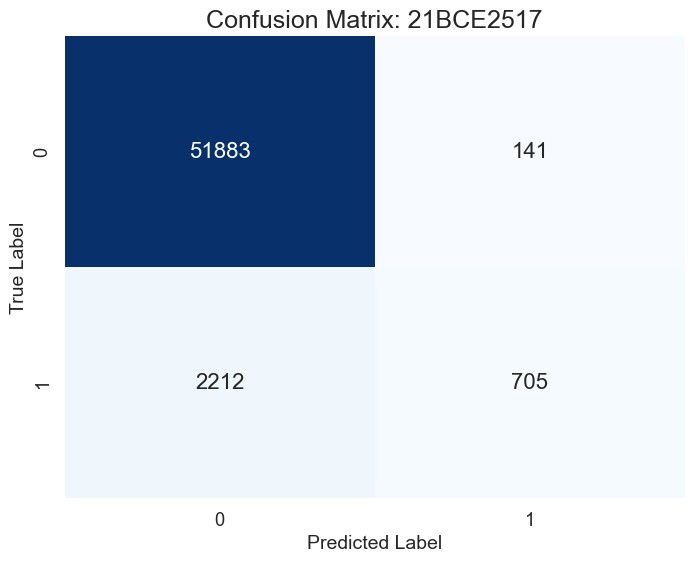

In [104]:
model1 = SVC(kernel='rbf',C=0.1)
model1.fit(xtrain,ytrain)
ypreds = model1.predict(xtest)
cm = confusion_matrix(ytest, ypreds)


plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})

plt.title('Confusion Matrix: 21BCE2517', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()